In [1]:
import numpy as np
from distribution_dependence_plots import generate, plot_compare

num_entries = 50000
X_MIN = -4
X_MAX = 4
NUM_DIMS = 2
NUM_LABELS = 2

In [2]:
from matplotlib import pyplot as plt
def plot_compare(data_x, data_y, data_yp, gen_data_x, gen_data_y1, gen_data_y2):
    fig, ax = plt.subplots(2, 2, sharey=True)
    scat1 = ax[0, 0].scatter(x=data_x[:, 0], y=data_x[:, 1], c = data_yp[:, 0], cmap = "gist_rainbow", vmin=0.0, vmax=1.0)
    ax[0, 0].set_title('X, p(Z)')
    scat2 = ax[0, 1].scatter(x=data_x[:, 0], y=data_x[:, 1], c = data_y[:, 0], cmap = "gist_rainbow", vmin=0.0, vmax=1.0)
    ax[0, 1].set_title('X, Z')
    scat3 = ax[1, 0].scatter(x=gen_data_x[:, 0], y=gen_data_x[:, 1],c = gen_data_y1[:, 0], cmap = "gist_rainbow", vmin=0.0, vmax=1.0)
    ax[1, 0].set_title('X\', p(Z\'), metoda 1')
    scat4 = ax[1, 1].scatter(x=gen_data_x[:, 0], y=gen_data_x[:, 1],c = gen_data_y2[:, 0], cmap = "gist_rainbow", vmin=0.0, vmax=1.0)
    ax[1, 1].set_title('X\', p(Z\'), metoda 2')
    ax[0, 0].set_xlabel('a_1')
    ax[0, 1].set_xlabel('a_1')
    ax[1, 0].set_xlabel('a_1')
    ax[1, 1].set_xlabel('a_1')
    ax[0, 0].set_ylabel('a_2')
    ax[0, 1].set_ylabel('a_2')
    ax[1, 0].set_ylabel('a_2')
    ax[1, 1].set_ylabel('a_2')
    for a in ax.flat:
        a.label_outer()
    fig.colorbar(scat1, ax=ax[0, 0], label='z')
    fig.colorbar(scat2, ax=ax[0, 1], label='z')
    fig.colorbar(scat3, ax=ax[1, 0], label='z')
    fig.colorbar(scat4, ax=ax[1, 1], label='z')

E:\Workspace\Studia\Studia MGR\Praca Magisterska - uczenie z danych zagregowanych\pythonPlayground\distribution_dependence_plots.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["c"] = 1


Generating points...
aggregating on attr_0
aggregating on attr_1
aggregating on attr_0 attr_1


Assigning probabilities clicks: 100%|██████████| 158/158 [00:00<00:00, 2590.10it/s]


92063.07801704513 100000.88830209529 0.9206226022605857


100%|██████████| 50000/50000 [04:26<00:00, 187.33it/s]


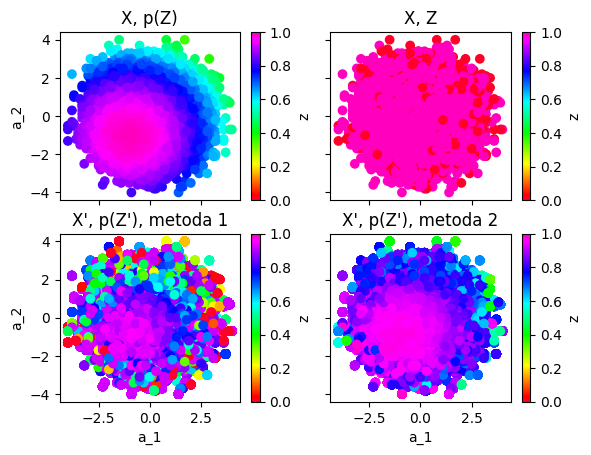

In [12]:
def prob_func(x: list[float]) -> np.ndarray:
    m = max(abs(X_MIN), abs(X_MAX))
    top = abs(np.sum([(m+1)*(m+1) for dim in x]))
    p0 = abs(np.sum([(dim+1)*(dim+1) for dim in x]))/top
    p = [p0, 1-p0]
    p /= sum(p)
    return p

def val_func(x: list[float]) -> np.ndarray:
    # returns array of y values. each y value is a function f(y_i) = (x_1, ..., x_n)
    val = float(np.random.choice([0,1], size=1, p=prob_func(x)))
    return val
    # val = np.array([(dim+1)*(dim+1) for dim in x])
    # return np.mean(val)

data_x = np.ndarray(shape=(int(num_entries), NUM_DIMS))
for i in range(NUM_DIMS):
    data_x[:, i] = np.around(np.random.normal(0, 1, num_entries), decimals=1)
data_x = np.where(data_x > X_MAX, np.full(data_x.shape, X_MAX), data_x)
data_x = np.where(data_x < X_MIN, np.full(data_x.shape, X_MIN), data_x)
data_y = np.ndarray(shape=(num_entries, NUM_LABELS))
data_y[:, 0] = [val_func(x) for x in data_x]
data_yp = np.array([[prob_func(x)[1]] for x in data_x])

gen_data_x, gen_data_y1, gen_data_y2 = generate(data_x, data_y)
plot_compare(data_x, data_y, data_yp, gen_data_x, gen_data_y1, gen_data_y2)

E:\Workspace\Studia\Studia MGR\Praca Magisterska - uczenie z danych zagregowanych\pythonPlayground\distribution_dependence_plots.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["c"] = 1


Generating points...
aggregating on attr_0
aggregating on attr_1
aggregating on attr_0 attr_1


Assigning probabilities clicks: 100%|██████████| 157/157 [00:00<00:00, 2854.55it/s]


48978.11085252062 100003.1615733286 0.489765624225858


100%|██████████| 50000/50000 [04:07<00:00, 201.64it/s]


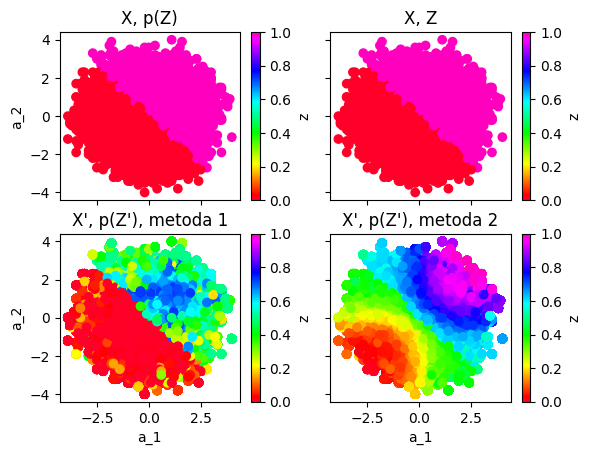

In [3]:
def prob_func(x: list[float]) -> np.ndarray:
    m = max(abs(X_MIN), abs(X_MAX))
    dim0 = np.sum([dim if i % 2 == 0 else 0 for i, dim in enumerate(x)])
    dim1 = np.sum([dim if i % 2 == 1 else 0 for i, dim in enumerate(x)])
    if dim0 + dim1 > 0:
        p0 = 0
    else:
        p0 = 1
    p = [p0, 1-p0]
    return p

def val_func(x: list[float]) -> np.ndarray:
    # returns array of y values. each y value is a function f(y_i) = (x_1, ..., x_n)
    val = float(np.random.choice([0,1], size=1, p=prob_func(x)))
    return val
    # val = np.array([(dim+1)*(dim+1) for dim in x])
    # return np.mean(val)

data_x = np.ndarray(shape=(int(num_entries), NUM_DIMS))
for i in range(NUM_DIMS):
    data_x[:, i] = np.around(np.random.normal(0, 1, num_entries), decimals=1)
data_x = np.where(data_x > X_MAX, np.full(data_x.shape, X_MAX), data_x)
data_x = np.where(data_x < X_MIN, np.full(data_x.shape, X_MIN), data_x)
data_y = np.ndarray(shape=(num_entries, NUM_LABELS))
data_y[:, 0] = [val_func(x) for x in data_x]
data_yp = np.array([[prob_func(x)[1]] for x in data_x])

gen_data_x, gen_data_y1, gen_data_y2 = generate(data_x, data_y)
plot_compare(data_x, data_y, data_yp, gen_data_x, gen_data_y1, gen_data_y2)

E:\Workspace\Studia\Studia MGR\Praca Magisterska - uczenie z danych zagregowanych\pythonPlayground\distribution_dependence_plots.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["c"] = 1


Generating points...
aggregating on attr_0
aggregating on attr_1
aggregating on attr_0 attr_1


Assigning probabilities clicks: 100%|██████████| 159/159 [00:00<00:00, 3115.63it/s]

7444.732047903017

 104170.10271587342 0.07146707024191683


100%|██████████| 50000/50000 [03:56<00:00, 211.09it/s]


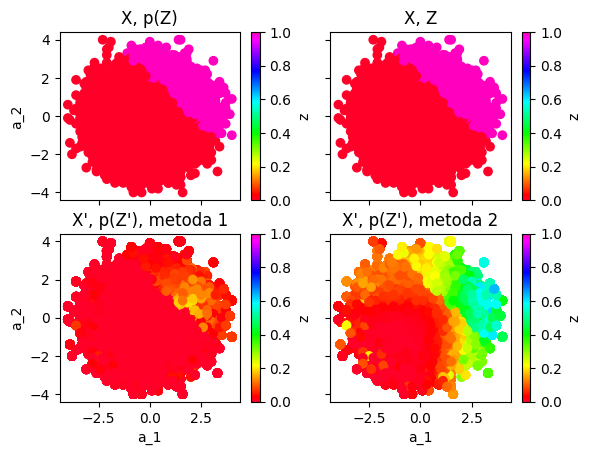

In [10]:
def prob_func(x: list[float]) -> np.ndarray:
    m = max(abs(X_MIN), abs(X_MAX))
    dim0 = np.sum([dim if i % 2 == 0 else 0 for i, dim in enumerate(x)])
    dim1 = np.sum([dim if i % 2 == 1 else 0 for i, dim in enumerate(x)])
    if dim0 + dim1 > 2:
        p0 = 0
    else:
        p0 = 1
    p = [p0, 1-p0]
    return p

def val_func(x: list[float]) -> np.ndarray:
    # returns array of y values. each y value is a function f(y_i) = (x_1, ..., x_n)
    val = float(np.random.choice([0,1], size=1, p=prob_func(x)))
    return val
    # val = np.array([(dim+1)*(dim+1) for dim in x])
    # return np.mean(val)

data_x = np.ndarray(shape=(int(num_entries), NUM_DIMS))
for i in range(NUM_DIMS):
    data_x[:, i] = np.around(np.random.normal(0, 1, num_entries), decimals=1)
data_x = np.where(data_x > X_MAX, np.full(data_x.shape, X_MAX), data_x)
data_x = np.where(data_x < X_MIN, np.full(data_x.shape, X_MIN), data_x)
data_y = np.ndarray(shape=(num_entries, NUM_LABELS))
data_y[:, 0] = [val_func(x) for x in data_x]
data_yp = np.array([[prob_func(x)[1]] for x in data_x])

gen_data_x, gen_data_y1, gen_data_y2 = generate(data_x, data_y)
plot_compare(data_x, data_y, data_yp, gen_data_x, gen_data_y1, gen_data_y2)

E:\Workspace\Studia\Studia MGR\Praca Magisterska - uczenie z danych zagregowanych\pythonPlayground\distribution_dependence_plots.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["c"] = 1


Generating points...
aggregating on attr_0
aggregating on attr_1
aggregating on attr_0 attr_1


Assigning probabilities clicks: 100%|██████████| 158/158 [00:00<00:00, 2872.71it/s]


48022.05700502481 100010.6455777645 0.4801694532377023


100%|██████████| 50000/50000 [03:45<00:00, 221.34it/s]


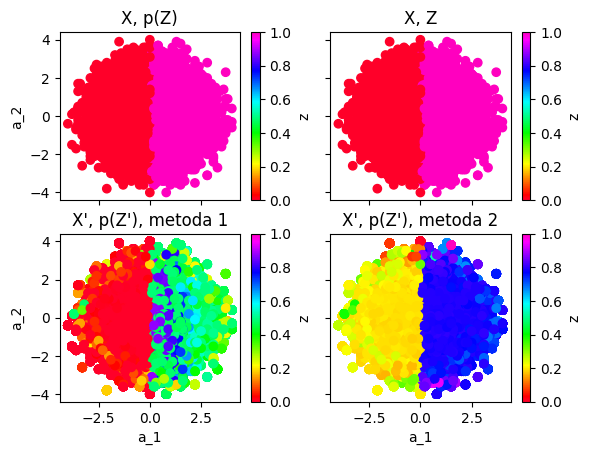

In [5]:
def prob_func(x: list[float]) -> np.ndarray:
    m = max(abs(X_MIN), abs(X_MAX))
    dim0 = np.sum([dim if i % 2 == 0 else 0 for i, dim in enumerate(x)])
    dim1 = np.sum([dim if i % 2 == 1 else 0 for i, dim in enumerate(x)])
    if dim0 > 0:
        p0 = 0
    else:
        p0 = 1
    p = [p0, 1-p0]
    return p

def val_func(x: list[float]) -> np.ndarray:
    # returns array of y values. each y value is a function f(y_i) = (x_1, ..., x_n)
    val = float(np.random.choice([0,1], size=1, p=prob_func(x)))
    return val
    # val = np.array([(dim+1)*(dim+1) for dim in x])
    # return np.mean(val)

data_x = np.ndarray(shape=(int(num_entries), NUM_DIMS))
for i in range(NUM_DIMS):
    data_x[:, i] = np.around(np.random.normal(0, 1, num_entries), decimals=1)
data_x = np.where(data_x > X_MAX, np.full(data_x.shape, X_MAX), data_x)
data_x = np.where(data_x < X_MIN, np.full(data_x.shape, X_MIN), data_x)
data_y = np.ndarray(shape=(num_entries, NUM_LABELS))
data_y[:, 0] = [val_func(x) for x in data_x]
data_yp = np.array([[prob_func(x)[1]] for x in data_x])

gen_data_x, gen_data_y1, gen_data_y2 = generate(data_x, data_y)
plot_compare(data_x, data_y, data_yp, gen_data_x, gen_data_y1, gen_data_y2)

E:\Workspace\Studia\Studia MGR\Praca Magisterska - uczenie z danych zagregowanych\pythonPlayground\distribution_dependence_plots.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["c"] = 1


Generating points...
aggregating on attr_0
aggregating on attr_1
aggregating on attr_0 attr_1


Assigning probabilities clicks: 100%|██████████| 158/158 [00:00<00:00, 3159.96it/s]

1971.8689122748133

 104127.05683951857 0.01893714248846842


100%|██████████| 50000/50000 [03:40<00:00, 227.10it/s]


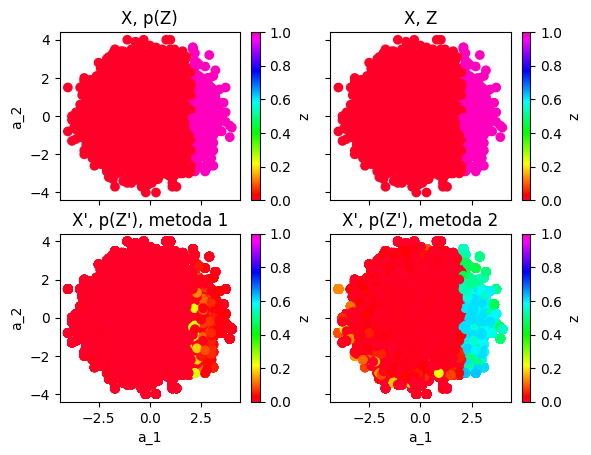

In [11]:
def prob_func(x: list[float]) -> np.ndarray:
    m = max(abs(X_MIN), abs(X_MAX))
    dim0 = np.sum([dim if i % 2 == 0 else 0 for i, dim in enumerate(x)])
    dim1 = np.sum([dim if i % 2 == 1 else 0 for i, dim in enumerate(x)])
    if dim0 > 2:
        p0 = 0
    else:
        p0 = 1
    p = [p0, 1-p0]
    return p

def val_func(x: list[float]) -> np.ndarray:
    # returns array of y values. each y value is a function f(y_i) = (x_1, ..., x_n)
    val = float(np.random.choice([0,1], size=1, p=prob_func(x)))
    return val
    # val = np.array([(dim+1)*(dim+1) for dim in x])
    # return np.mean(val)

data_x = np.ndarray(shape=(int(num_entries), NUM_DIMS))
for i in range(NUM_DIMS):
    data_x[:, i] = np.around(np.random.normal(0, 1, num_entries), decimals=1)
data_x = np.where(data_x > X_MAX, np.full(data_x.shape, X_MAX), data_x)
data_x = np.where(data_x < X_MIN, np.full(data_x.shape, X_MIN), data_x)
data_y = np.ndarray(shape=(num_entries, NUM_LABELS))
data_y[:, 0] = [val_func(x) for x in data_x]
data_yp = np.array([[prob_func(x)[1]] for x in data_x])

gen_data_x, gen_data_y1, gen_data_y2 = generate(data_x, data_y)
plot_compare(data_x, data_y, data_yp, gen_data_x, gen_data_y1, gen_data_y2)

E:\Workspace\Studia\Studia MGR\Praca Magisterska - uczenie z danych zagregowanych\pythonPlayground\distribution_dependence_plots.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["c"] = 1


Generating points...
aggregating on attr_0
aggregating on attr_1
aggregating on attr_0 attr_1


Assigning probabilities clicks: 100%|██████████| 157/157 [00:00<00:00, 3924.91it/s]


50017.201240596565 150354.4449705288 0.332661939262258


100%|██████████| 50000/50000 [03:38<00:00, 229.28it/s]


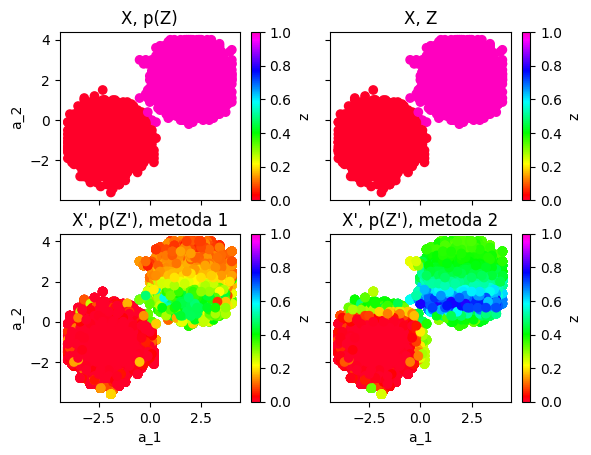

In [7]:
def prob_func(x: list[float]) -> np.ndarray:
    m = max(abs(X_MIN), abs(X_MAX))
    dim0 = np.sum([dim if i % 2 == 0 else 0 for i, dim in enumerate(x)])
    dim1 = np.sum([dim if i % 2 == 1 else 0 for i, dim in enumerate(x)])
    if dim0 + dim1 > 0:
        p0 = 0
    else:
        p0 = 1
    p = [p0, 1-p0]
    return p

def val_func(x: list[float]) -> np.ndarray:
    # returns array of y values. each y value is a function f(y_i) = (x_1, ..., x_n)
    val = float(np.random.choice([0,1], size=1, p=prob_func(x)))
    return val
    # val = np.array([(dim+1)*(dim+1) for dim in x])
    # return np.mean(val)

data_x = np.ndarray(shape=(int(num_entries), NUM_DIMS))
data_x_1 = np.ndarray(shape=(int(num_entries/2), NUM_DIMS))
data_x_2 = np.ndarray(shape=(int(num_entries/2), NUM_DIMS))
data_x_1[:,0] = np.around(np.random.normal(-2,0.6,int(num_entries/2)), decimals=1)
data_x_1[:,1] = np.around(np.random.normal(-1,0.6,int(num_entries/2)), decimals=1)
data_x_2[:,0] = np.around(np.random.normal(2, 0.6, int(num_entries/2)), decimals=1)
data_x_2[:,1] = np.around(np.random.normal(2, 0.6, int(num_entries/2)), decimals=1)
data_x = np.concatenate((data_x_1, data_x_2), axis=0)
data_x = np.where(data_x > X_MAX, np.full(data_x.shape, X_MAX), data_x)
data_x = np.where(data_x < X_MIN, np.full(data_x.shape, X_MIN), data_x)
data_y = np.ndarray(shape=(num_entries, NUM_LABELS))
data_y[:, 0] = [val_func(x) for x in data_x]
data_yp = np.array([[prob_func(x)[1]] for x in data_x])

gen_data_x, gen_data_y1, gen_data_y2 = generate(data_x, data_y)
plot_compare(data_x, data_y, data_yp, gen_data_x, gen_data_y1, gen_data_y2)

E:\Workspace\Studia\Studia MGR\Praca Magisterska - uczenie z danych zagregowanych\pythonPlayground\distribution_dependence_plots.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["c"] = 1


Generating points...
aggregating on attr_0
aggregating on attr_1
aggregating on attr_0 attr_1


Assigning probabilities clicks: 100%|██████████| 120/120 [00:00<00:00, 3529.69it/s]


50000.11282833699 100572.84628866287 0.49715320460183976


100%|██████████| 50000/50000 [02:19<00:00, 358.85it/s]


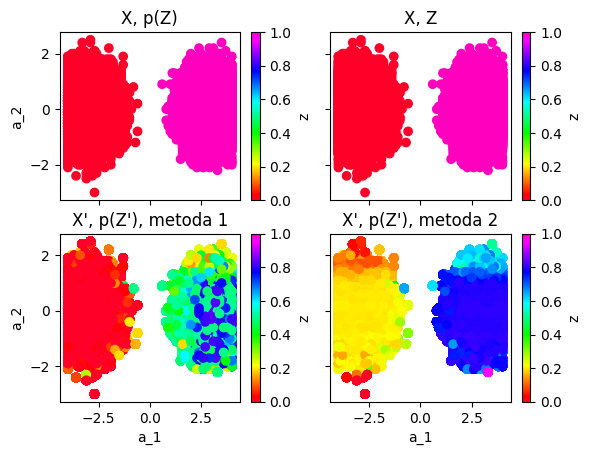

In [8]:
def prob_func(x: list[float]) -> np.ndarray:
    m = max(abs(X_MIN), abs(X_MAX))
    dim0 = np.sum([dim if i % 2 == 0 else 0 for i, dim in enumerate(x)])
    dim1 = np.sum([dim if i % 2 == 1 else 0 for i, dim in enumerate(x)])
    if dim0 > 0:
        p0 = 0
    else:
        p0 = 1
    p = [p0, 1-p0]
    return p

def val_func(x: list[float]) -> np.ndarray:
    # returns array of y values. each y value is a function f(y_i) = (x_1, ..., x_n)
    val = float(np.random.choice([0,1], size=1, p=prob_func(x)))
    return val
    # val = np.array([(dim+1)*(dim+1) for dim in x])
    # return np.mean(val)

data_x = np.ndarray(shape=(int(num_entries), NUM_DIMS))
data_x_1 = np.ndarray(shape=(int(num_entries/2), NUM_DIMS))
data_x_2 = np.ndarray(shape=(int(num_entries/2), NUM_DIMS))
data_x_1[:,0] = np.around(np.random.normal(-3,0.6,int(num_entries/2)), decimals=1)
data_x_1[:,1] = np.around(np.random.normal(0, 0.6,int(num_entries/2)), decimals=1)
data_x_2[:,0] = np.around(np.random.normal(3, 0.6, int(num_entries/2)), decimals=1)
data_x_2[:,1] = np.around(np.random.normal(0, 0.6, int(num_entries/2)), decimals=1)
data_x = np.concatenate((data_x_1, data_x_2), axis=0)
data_x = np.where(data_x > X_MAX, np.full(data_x.shape, X_MAX), data_x)
data_x = np.where(data_x < X_MIN, np.full(data_x.shape, X_MIN), data_x)
data_y = np.ndarray(shape=(num_entries, NUM_LABELS))
data_y[:, 0] = [val_func(x) for x in data_x]
data_yp = np.array([[prob_func(x)[1]] for x in data_x])

gen_data_x, gen_data_y1, gen_data_y2 = generate(data_x, data_y)
plot_compare(data_x, data_y, data_yp, gen_data_x, gen_data_y1, gen_data_y2)

E:\Workspace\Studia\Studia MGR\Praca Magisterska - uczenie z danych zagregowanych\pythonPlayground\distribution_dependence_plots.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["c"] = 1


Generating points...
aggregating on attr_0
aggregating on attr_1
aggregating on attr_0 attr_1


Assigning probabilities clicks: 100%|██████████| 118/118 [00:00<00:00, 3369.45it/s]


46920.34409489009 100603.09107890251 0.4663906803628001


100%|██████████| 50000/50000 [02:13<00:00, 375.32it/s]


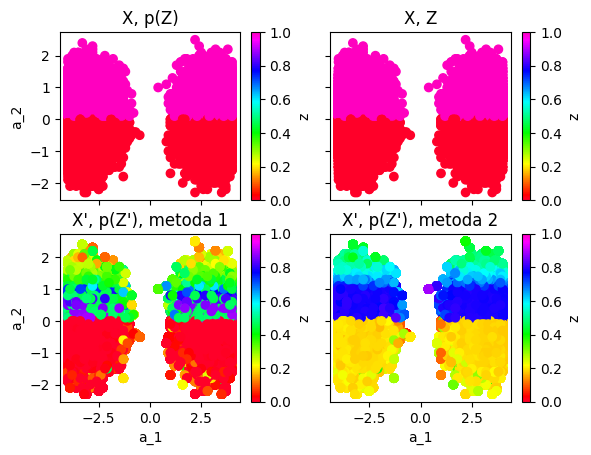

In [9]:
def prob_func(x: list[float]) -> np.ndarray:
    m = max(abs(X_MIN), abs(X_MAX))
    dim0 = np.sum([dim if i % 2 == 0 else 0 for i, dim in enumerate(x)])
    dim1 = np.sum([dim if i % 2 == 1 else 0 for i, dim in enumerate(x)])
    if dim1 > 0:
        p0 = 0
    else:
        p0 = 1
    p = [p0, 1-p0]
    return p

def val_func(x: list[float]) -> np.ndarray:
    # returns array of y values. each y value is a function f(y_i) = (x_1, ..., x_n)
    val = float(np.random.choice([0,1], size=1, p=prob_func(x)))
    return val
    # val = np.array([(dim+1)*(dim+1) for dim in x])
    # return np.mean(val)

data_x = np.ndarray(shape=(int(num_entries), NUM_DIMS))
data_x_1 = np.ndarray(shape=(int(num_entries/2), NUM_DIMS))
data_x_2 = np.ndarray(shape=(int(num_entries/2), NUM_DIMS))
data_x_1[:,0] = np.around(np.random.normal(-3,0.6,int(num_entries/2)), decimals=1)
data_x_1[:,1] = np.around(np.random.normal(0, 0.6,int(num_entries/2)), decimals=1)
data_x_2[:,0] = np.around(np.random.normal(3, 0.6, int(num_entries/2)), decimals=1)
data_x_2[:,1] = np.around(np.random.normal(0, 0.6, int(num_entries/2)), decimals=1)
data_x = np.concatenate((data_x_1, data_x_2), axis=0)
data_x = np.where(data_x > X_MAX, np.full(data_x.shape, X_MAX), data_x)
data_x = np.where(data_x < X_MIN, np.full(data_x.shape, X_MIN), data_x)
data_y = np.ndarray(shape=(num_entries, NUM_LABELS))
data_y[:, 0] = [val_func(x) for x in data_x]
data_yp = np.array([[prob_func(x)[1]] for x in data_x])

gen_data_x, gen_data_y1, gen_data_y2 = generate(data_x, data_y)
plot_compare(data_x, data_y, data_yp, gen_data_x, gen_data_y1, gen_data_y2)